In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import time
import os
import matplotlib.pyplot as plt



In [ ]:
# Step 1: Mount Google Drive (already done, but included for completeness)
# drive.mount('/content/drive')

# Define paths
base_dir = '/content/drive/My Drive/LeafDataset'
train_dir = os.path.join(base_dir, 'Training')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'testing')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 3: Set up ImageDataGenerator for preprocessing and augmentation
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Training: Normalize and augment
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)


# Validation and Testing: Only normalize
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Step 4: Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

Found 906 images belonging to 2 classes.
Found 112 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


In [ ]:
# Define the CNN model
inputs = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)


# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

EPOCHS = 30

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
start_time = time.time()
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Total Training Time: {training_time:.2f} seconds")
print(f"Average Time per Epoch: {training_time / len(history.history['loss']):.2f} seconds")



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 262s 9s/step - accuracy: 0.5146 - loss: 0.7286 - val_accuracy: 0.5893 - val_loss: 0.6718
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 561ms/step - accuracy: 0.6217 - loss: 0.6577 - val_accuracy: 0.5625 - val_loss: 0.6594
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 543ms/step - accuracy: 0.5988 - loss: 0.6675 - val_accuracy: 0.6786 - val_loss: 0.6227
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 537ms/step - accuracy: 0.6602 - loss: 0.6065 - val_accuracy: 0.6696 - val_loss: 0.5787
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 532ms/step - accuracy: 0.7210 - loss: 0.5624 - val_accuracy: 0.6964 - val_loss: 0.5535
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 537ms/step - accuracy: 0.7172 - loss: 0.5458 - val_accuracy: 0.7589 - val_loss: 0.5261
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 557ms/step - accuracy: 0.7527 - loss: 0.5170 - val_accuracy: 0.6786 - val_loss: 0.5816
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 559ms/step - accuracy: 0.7712 - loss: 0.4963 - val_accura

In [20]:
# Save training history

model.save(os.path.join(base_dir, 'cnn_binary_classification_model.h5'))

# Print final performance
print("\nFinal Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])
print("Final Training Loss:", history.history['loss'][-1])
print("Final Validation Loss:", history.history['val_loss'][-1])


Final Training Accuracy: 0.9094922542572021
Final Validation Accuracy: 0.8214285969734192
Final Training Loss: 0.23090490698814392
Final Validation Loss: 0.5236842036247253


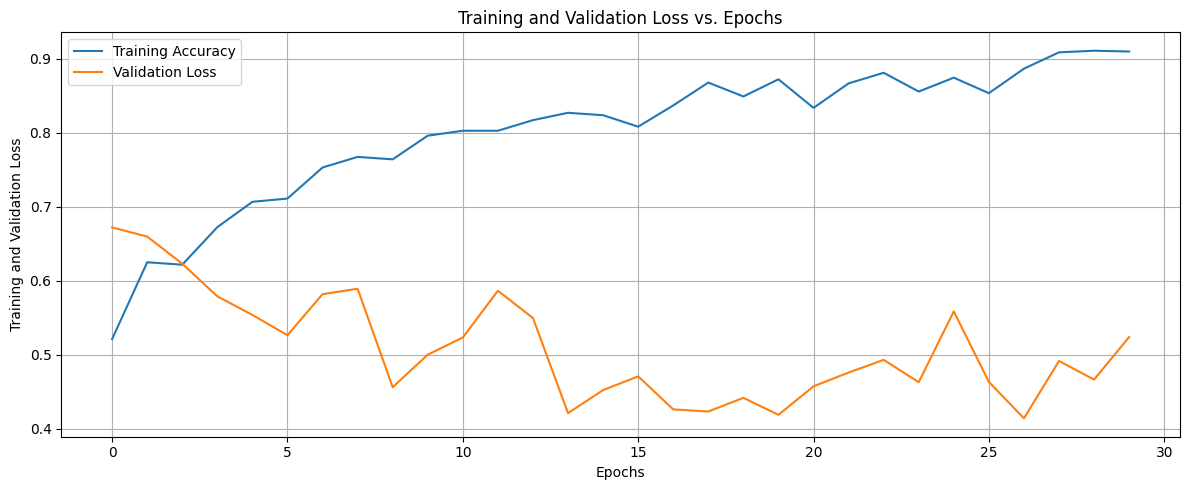

In [21]:
# Step 1: Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Training Accuracy vs Validation Loss plot
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
# plt.savefig(plot_path_acc_loss)
plt.show()


Found 113 images belonging to 2 classes.


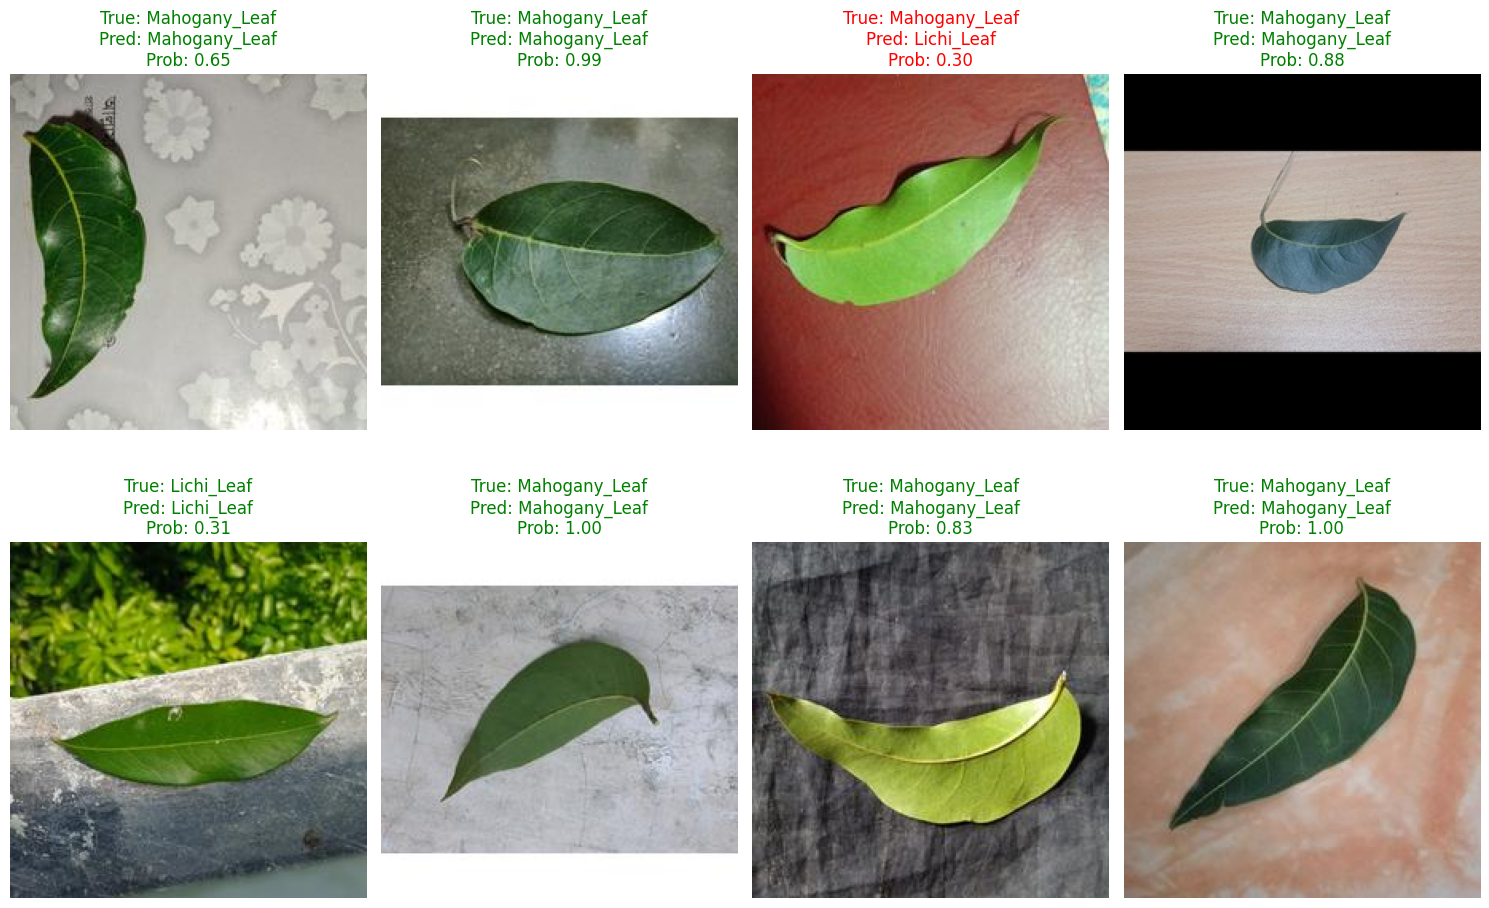

In [22]:
# Step 2: Visualize test predictions
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'testing'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

# Load model
# model = tf.keras.models.load_model(model_path)

# Get class names
class_names = list(test_generator.class_indices.keys())

# Get 8 test samples
test_generator.reset()
images, true_labels = next(test_generator)
predictions = model.predict(images, verbose=0)
pred_labels = (predictions > 0.5).astype(int).flatten()
probabilities = predictions.flatten()

# Plot 8 samples
plt.figure(figsize=(15, 10))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    true_label = class_names[int(true_labels[i])]
    pred_label = class_names[pred_labels[i]]
    prob = probabilities[i]
    title = f'True: {true_label}\nPred: {pred_label}\nProb: {prob:.2f}'
    plt.title(title, color='green' if true_label == pred_label else 'red')
    plt.axis('off')
plt.tight_layout()
# plt.savefig(plot_path_test_samples)
plt.show()